## Casia dataset

Preprocessing of Casia dataset.

Goal: Get 2 dataframes.

* First dataframe (one row per image): ID, Filename, Gender, Age Range

* Second dataframe (one row per person): ID, Name, Min Age, Max Age, Age Span, Number of Age Ranges, Number of Images, Gender


In [1]:
import pandas as pd
import numpy as np

In [2]:
with open('MetaData/casia-webface.txt') as f:
    lines = f.read().splitlines()

In [3]:
list_of_rows = [[int(lines[i].split(" ")[0]), str(lines[i].split(" ")[1]), float(lines[i].split(" ")[2]), int(lines[i].split(" ")[3])] for i in range(len(lines))]
df_casia = pd.DataFrame(list_of_rows, columns=["ID", "Filename", "Age", "Gender"])
df_casia

,ID,Filename,Age,Gender
0,0,casia-webface/000000/00000001.jpg,26.0,1
1,0,casia-webface/000000/00000002.jpg,30.0,1
2,0,casia-webface/000000/00000003.jpg,31.0,1
3,0,casia-webface/000000/00000004.jpg,28.0,1
4,0,casia-webface/000000/00000005.jpg,32.0,1
...,...,...,...,...
462329,10571,casia-webface/010571/00490619.jpg,29.5,0
462330,10571,casia-webface/010571/00490620.jpg,22.0,0
462331,10571,casia-webface/010571/00490621.jpg,35.5,1
462332,10571,casia-webface/010571/00490622.jpg,28.0,0


In [4]:
# Create age-range function
def age_range_func(x):
    
    if x <= 10:
        return '0-10'
    elif x <= 20:
        return '11-20'
    elif x <= 30:
        return '21-30'
    elif x <= 40:
        return '31-40'
    elif x <= 50:
        return '41-50'
    elif x <= 60:
        return '51-60'
    elif x <= 70:
        return '61-70'
    else:
        return '70+'

#Adding column
df_casia["Age Range"] = df_casia["Age"].apply(age_range_func)
df_casia

,ID,Filename,Age,Gender,Age Range
0,0,casia-webface/000000/00000001.jpg,26.0,1,21-30
1,0,casia-webface/000000/00000002.jpg,30.0,1,21-30
2,0,casia-webface/000000/00000003.jpg,31.0,1,31-40
3,0,casia-webface/000000/00000004.jpg,28.0,1,21-30
4,0,casia-webface/000000/00000005.jpg,32.0,1,31-40
...,...,...,...,...,...
462329,10571,casia-webface/010571/00490619.jpg,29.5,0,21-30
462330,10571,casia-webface/010571/00490620.jpg,22.0,0,21-30
462331,10571,casia-webface/010571/00490621.jpg,35.5,1,31-40
462332,10571,casia-webface/010571/00490622.jpg,28.0,0,21-30


In [5]:
def creating_individual_dataframe(df_image):
    """
        Creating a dataframe with information of each person from a dataframe (called "df_image") that holds information of each image. 

        Criteria: The dataframe df_image needs to have colums 
            ID: Specific ID for each person
            File Name: The filename of the image
            Name: Name of the person
            Age: Ground truth age of the person
            Gender: 0 if female and 1 if male
            Age Range: One of the ranges 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 70+
    """

    ID_indiv = list(np.unique(np.array(df_image["ID"])))

    MinAge = []
    MaxAge = []
    AgeSpan = []
    NumAgeRanges = []
    NumImages = []
    Gender_Unique = []

    for i in ID_indiv:
        
        ages = np.array(df_image.loc[df_image["ID"] == i, "Age"])
        gender_indiv = np.array(df_image.loc[df_image["ID"] == i, "Gender"])

        max_age = np.max(ages)
        min_age = np.min(ages)
        number_of_images = len(ages)
        
        MinAge.append(min_age)
        MaxAge.append(max_age)
        AgeSpan.append(max_age - min_age)
        NumImages.append(number_of_images)
        
        NumAgeRanges.append(len(np.unique(np.array(df_image.loc[df_image["ID"] == i, "Age Range"]))))

        # We are taking the average of each gender if the gender isn't the "ground-truth" we will detect noice if gender equals 0.5
        Gender_Unique.append(np.average(gender_indiv))


    # Create Individual DataFrame

    data_indiv = {"ID" : ID_indiv,
                "Min Age" : MinAge,
                "Max Age" : MaxAge,
                "Age Span" : AgeSpan,
                "Number of Age Ranges" : NumAgeRanges,
                "Number of Images" : NumImages,
                "Gender": Gender_Unique}
            
    df_individual = pd.DataFrame(data_indiv)
    
    return df_individual

df_casia_individual = creating_individual_dataframe(df_casia)
df_casia_individual

,ID,Min Age,Max Age,Age Span,Number of Age Ranges,Number of Images,Gender
0,0,20.0,36.0,16.0,3,12,1.000000
1,1,5.0,67.5,62.5,7,254,0.019685
2,2,31.0,69.0,38.0,4,62,1.000000
3,3,13.0,76.0,63.0,7,364,0.964286
4,4,7.0,66.0,59.0,5,72,0.027778
...,...,...,...,...,...,...,...
10567,10567,11.5,39.0,27.5,3,52,0.038462
10568,10568,22.5,56.0,33.5,4,16,0.937500
10569,10569,20.5,36.5,16.0,2,16,0.062500
10570,10570,5.0,49.0,44.0,5,27,0.000000


### Average Gender

Since the gender of each image is not the "ground truth" (in that case we only would have 0 or 1) we only need those who has gender around 0 or 1.

Gender close to 0.5 could imply that the images are noisy. 

In [6]:
sum((df_casia_individual["Gender"] >= 0.0001) & (df_casia_individual["Gender"] <= 0.9999))


5658

In [7]:
df_casia_individual.loc[df_casia_individual["Gender"] == 0.5]

,ID,Min Age,Max Age,Age Span,Number of Age Ranges,Number of Images,Gender
668,668,6.5,42.5,36.0,5,22,0.5
2452,2452,39.0,66.0,27.0,4,10,0.5
4036,4036,5.0,49.5,44.5,5,18,0.5
5207,5207,12.0,33.0,21.0,3,38,0.5
5521,5521,7.0,45.0,38.0,5,20,0.5
6100,6100,11.0,27.0,16.0,2,52,0.5
6550,6550,4.0,42.5,38.5,5,32,0.5
6899,6899,18.5,36.0,17.5,3,28,0.5
7261,7261,24.0,45.5,21.5,3,22,0.5
7872,7872,10.0,42.0,32.0,5,28,0.5


In [8]:
# Let's check ID 668

df_casia.loc[df_casia["ID"] == 668]

,ID,Filename,Age,Gender,Age Range
56795,668,casia-webface/000668/00060964.jpg,26.0,1,21-30
56796,668,casia-webface/000668/00060965.jpg,6.5,0,0-10
56797,668,casia-webface/000668/00060966.jpg,20.0,1,11-20
56798,668,casia-webface/000668/00060967.jpg,23.0,0,21-30
56799,668,casia-webface/000668/00060968.jpg,30.5,1,31-40
56800,668,casia-webface/000668/00060969.jpg,20.0,0,11-20
56801,668,casia-webface/000668/00060970.jpg,31.0,1,31-40
56802,668,casia-webface/000668/00060971.jpg,14.0,0,11-20
56803,668,casia-webface/000668/00060972.jpg,30.5,0,31-40
56804,668,casia-webface/000668/00060973.jpg,7.0,0,0-10


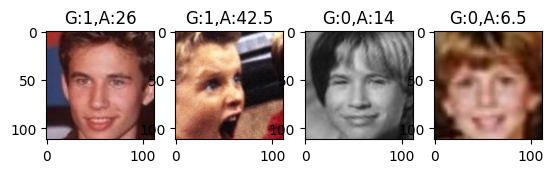

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

example_one = mpimg.imread('Images/casia-webface/000668/00060964.jpg')
example_two = mpimg.imread('Images/casia-webface/000668/00060985.jpg')
example_three = mpimg.imread('Images/casia-webface/000668/00060981.jpg')
example_four = mpimg.imread('Images/casia-webface/000668/00060965.jpg')

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
ax1.imshow(example_one)
ax2.imshow(example_two)
ax3.imshow(example_three)
ax4.imshow(example_four)

ax1.set_title("G:1,A:26")
ax2.set_title("G:1,A:42.5")
ax3.set_title("G:0,A:14")
ax4.set_title("G:0,A:6.5")

plt.show()


In [10]:
# Both black and white
# Different angles
# Poor age estimation

In [11]:

noise_id = df_casia_individual.loc[(df_casia_individual["Gender"] >= 0.0001) & (df_casia_individual["Gender"] <= 0.9999)]["ID"].to_list()

len(noise_id)


5658

In [12]:
df_casia

,ID,Filename,Age,Gender,Age Range
0,0,casia-webface/000000/00000001.jpg,26.0,1,21-30
1,0,casia-webface/000000/00000002.jpg,30.0,1,21-30
2,0,casia-webface/000000/00000003.jpg,31.0,1,31-40
3,0,casia-webface/000000/00000004.jpg,28.0,1,21-30
4,0,casia-webface/000000/00000005.jpg,32.0,1,31-40
...,...,...,...,...,...
462329,10571,casia-webface/010571/00490619.jpg,29.5,0,21-30
462330,10571,casia-webface/010571/00490620.jpg,22.0,0,21-30
462331,10571,casia-webface/010571/00490621.jpg,35.5,1,31-40
462332,10571,casia-webface/010571/00490622.jpg,28.0,0,21-30


In [13]:
# Delete noise ID's

for ids in noise_id:
    df_casia.drop(df_casia[df_casia['ID'] == ids].index, inplace = True)

df_casia = df_casia.reset_index(drop=True)
df_casia

,ID,Filename,Age,Gender,Age Range
0,0,casia-webface/000000/00000001.jpg,26.0,1,21-30
1,0,casia-webface/000000/00000002.jpg,30.0,1,21-30
2,0,casia-webface/000000/00000003.jpg,31.0,1,31-40
3,0,casia-webface/000000/00000004.jpg,28.0,1,21-30
4,0,casia-webface/000000/00000005.jpg,32.0,1,31-40
...,...,...,...,...,...
135088,10570,casia-webface/010570/00490566.jpg,26.5,0,21-30
135089,10570,casia-webface/010570/00490567.jpg,13.0,0,11-20
135090,10570,casia-webface/010570/00490568.jpg,11.5,0,11-20
135091,10570,casia-webface/010570/00490569.jpg,14.0,0,11-20


In [14]:
# Update individual df

df_casia_individual = creating_individual_dataframe(df_casia)
df_casia_individual

,ID,Min Age,Max Age,Age Span,Number of Age Ranges,Number of Images,Gender
0,0,20.0,36.0,16.0,3,12,1.0
1,2,31.0,69.0,38.0,4,62,1.0
2,7,34.5,73.0,38.5,5,24,1.0
3,15,23.0,41.5,18.5,3,21,0.0
4,17,22.5,47.5,25.0,3,36,0.0
...,...,...,...,...,...,...,...
4909,10561,18.5,29.0,10.5,2,24,0.0
4910,10563,6.0,40.0,34.0,4,20,0.0
4911,10564,20.0,32.0,12.0,3,15,0.0
4912,10566,27.0,66.5,39.5,5,22,1.0


In [15]:
def createDataFrame(x,y, df_images, df_individual):
    """
    Creating a DataFrame with individual people that appers in at least x number of age ranges 
    and has y number of images. Note that it is based on the original DataFrame 'df_casia'
    """

    ID_list = list(df_individual.loc[(df_individual["Number of Age Ranges"] >= x) & (df_individual["Number of Images"] >= y), "ID"])

    if len(ID_list) == 0:
        return 'No images found with specific conditions'
    
    else:
        
        tempDataFrame = df_images[df_images["ID"] == ID_list[0]]
        
        if len(ID_list) == 1:
            
            return tempDataFrame.reset_index(drop=True)
        
        else:
            
            frames = [tempDataFrame]
            
            for i in ID_list[1:]:
                df_to_join = df_images[df_images["ID"] == i]
                frames.append(df_to_join)
            
            result = pd.concat(frames)
            return result.reset_index(drop=True)

In [16]:
df_casia = createDataFrame(3,30, df_casia, df_casia_individual)
df_casia

,ID,Filename,Age,Gender,Age Range
0,2,casia-webface/000002/00000273.jpg,44.5,1,41-50
1,2,casia-webface/000002/00000274.jpg,46.0,1,41-50
2,2,casia-webface/000002/00000275.jpg,56.0,1,51-60
3,2,casia-webface/000002/00000276.jpg,31.5,1,31-40
4,2,casia-webface/000002/00000277.jpg,34.5,1,31-40
...,...,...,...,...,...
66078,10553,casia-webface/010553/00490111.jpg,36.0,1,31-40
66079,10553,casia-webface/010553/00490113.jpg,34.0,1,31-40
66080,10553,casia-webface/010553/00490114.jpg,34.5,1,31-40
66081,10553,casia-webface/010553/00490115.jpg,26.0,1,21-30


In [17]:
# Update individual df

df_casia_individual = creating_individual_dataframe(df_casia)
df_casia_individual

,ID,Min Age,Max Age,Age Span,Number of Age Ranges,Number of Images,Gender
0,2,31.0,69.0,38.0,4,62,1.0
1,17,22.5,47.5,25.0,3,36,0.0
2,24,17.0,83.0,66.0,7,189,1.0
3,29,21.5,74.0,52.5,6,88,1.0
4,30,20.0,77.0,57.0,6,66,1.0
...,...,...,...,...,...,...,...
1269,10497,9.5,45.0,35.5,4,37,1.0
1270,10541,24.5,56.0,31.5,4,30,1.0
1271,10545,23.0,60.0,37.0,4,30,1.0
1272,10546,27.0,43.5,16.5,3,42,1.0


In [19]:

valid_filename = df_casia["Filename"].to_list()
len(valid_filename)
print(valid_filename[0])

casia-webface/000002/00000273.jpg


In [21]:
from PIL import Image
import os

for im in valid_filename:

    path_list = im.split("/")
    subfolder = path_list[1]
    pic_name = path_list[2]

    old_path = "Images/casia-webface/" + subfolder + "/" + pic_name
    new_path = "Images/casia-webface-valid-remote/" + subfolder + "_" + pic_name

    image = Image.open(old_path)
    image.save(new_path)

In [22]:
df_casia

,ID,Filename,Age,Gender,Age Range
0,2,casia-webface/000002/00000273.jpg,44.5,1,41-50
1,2,casia-webface/000002/00000274.jpg,46.0,1,41-50
2,2,casia-webface/000002/00000275.jpg,56.0,1,51-60
3,2,casia-webface/000002/00000276.jpg,31.5,1,31-40
4,2,casia-webface/000002/00000277.jpg,34.5,1,31-40
...,...,...,...,...,...
66078,10553,casia-webface/010553/00490111.jpg,36.0,1,31-40
66079,10553,casia-webface/010553/00490113.jpg,34.0,1,31-40
66080,10553,casia-webface/010553/00490114.jpg,34.5,1,31-40
66081,10553,casia-webface/010553/00490115.jpg,26.0,1,21-30


In [25]:
all_filenames = df_casia["Filename"].to_list()

for fn in all_filenames:
    
    fn_list = fn.split("/")
    
    subf = fn_list[1]
    im_name = fn_list[2]
    new_fn = str(subf) + "_" + str(im_name)
    df_casia["Filename"] = df_casia["Filename"].replace(fn, new_fn)
    

In [26]:
df_casia

,ID,Filename,Age,Gender,Age Range
0,2,000002_00000273.jpg,44.5,1,41-50
1,2,000002_00000274.jpg,46.0,1,41-50
2,2,000002_00000275.jpg,56.0,1,51-60
3,2,000002_00000276.jpg,31.5,1,31-40
4,2,000002_00000277.jpg,34.5,1,31-40
...,...,...,...,...,...
66078,10553,010553_00490111.jpg,36.0,1,31-40
66079,10553,010553_00490113.jpg,34.0,1,31-40
66080,10553,010553_00490114.jpg,34.5,1,31-40
66081,10553,010553_00490115.jpg,26.0,1,21-30


In [27]:
df_casia_individual

,ID,Min Age,Max Age,Age Span,Number of Age Ranges,Number of Images,Gender
0,2,31.0,69.0,38.0,4,62,1.0
1,17,22.5,47.5,25.0,3,36,0.0
2,24,17.0,83.0,66.0,7,189,1.0
3,29,21.5,74.0,52.5,6,88,1.0
4,30,20.0,77.0,57.0,6,66,1.0
...,...,...,...,...,...,...,...
1269,10497,9.5,45.0,35.5,4,37,1.0
1270,10541,24.5,56.0,31.5,4,30,1.0
1271,10545,23.0,60.0,37.0,4,30,1.0
1272,10546,27.0,43.5,16.5,3,42,1.0


In [28]:
df_casia.to_csv("/Users/ivarblohm/Documents/Github.nosync/ivarblohm/FaceProject/Images/send_to_remote_server/df_casia_images")
df_casia_individual.to_csv("/Users/ivarblohm/Documents/Github.nosync/ivarblohm/FaceProject/Images/send_to_remote_server/df_casia_individual")

In [ ]:
# Next step, run and see what images insight face found and images including only one person.
# Function to use: valid_faces_insightface(df_images, path_to_data):
# Remember to change function to use 112x112
# This needs to run on upppmax